In [13]:
!pip install wquantiles  # 두번째 코드에서 필요한 wquantiles 패키지 설치

ERROR: Invalid requirement: '#'


4.4

## 1.1 절사평균, 가중평균 p. 31

In [18]:
import pandas as pd
from scipy.stats import trim_mean  # 절사평균을 위한 함수
import numpy as np  
import wquantiles  # 설치한 패키지 불러오기

# 절사평균 구하기 p. 31
state = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/state.csv")
sm = state['Population'].mean()     # 평균
stm = trim_mean(state['Population'], 0.1) # 절사평균
sd = state['Population'].median()    # 중간값
print("평균 : " , sm)
print("절사평균 : " , stm)
print("중간값 : " , sd)

# 가중평균 구하기 p. 32
wm = np.average(state['Murder.Rate'], weights = state['Population']) # 가중평균
wd = wquantiles.median(state['Murder.Rate'], weights = state['Population'])  # 가중 중간값
print("가중평균 : " , wm)
print("가중 중간값 : " , wd)

평균 :  6162876.3
절사평균 :  4783697.125
중간값 :  4436369.5
가중평균 :  4.445833981123393
가중 중간값 :  4.4


## 1.2 표준편차, IQR, MAD p. 37

In [8]:
import pandas as pd
from statsmodels.robust.scale import mad # 중위절대편차(MAD)를 계산하기 위해 패키지의 mad 함수 사용

state = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/state.csv")

# 표준편차와 IQR 계산하기 p. 37
std = state['Population'].std() # 표준편차
iqr = state['Population'].quantile(0.75) - state['Population'].quantile(0.25)   # 분위수
Mad = mad(state['Population'])  # 중위절대편차
# 책에서는 robust.scale.mad 함수를 이용했는데 mad 함수를 사용했음
# import가 안됐음

print("표준편차 : " , std)
print("분위수 : " , iqr)
print("중위절대편차 : " , Mad)

표준편차 :  6848235.347401142
분위수 :  4847308.0
중위절대편차 :  3849876.1459979336


## 1.3 백분위수, 상자그림 p. 39

Text(0, 0.5, 'Population (millions)')

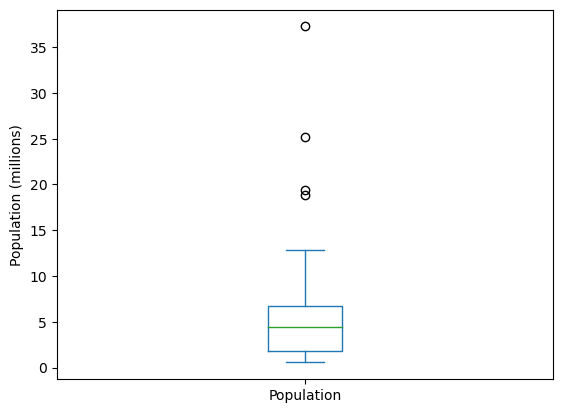

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

state = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/state.csv")

# 백분위수 p. 39
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

# 상자그림 p. 40
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')  # Y축 레이블 추가

## 1.4 도수분포표, 히스토그랩 p. 41

Text(0.5, 0, 'Population (millions)')

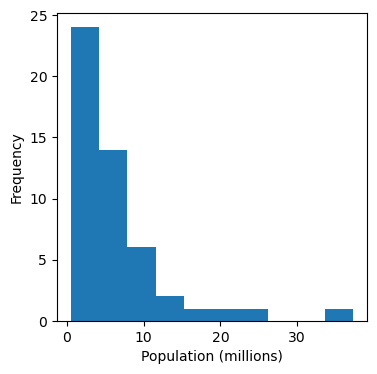

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

state = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/state.csv")

# 도수분포표 p. 41
binnedPopulation = pd.cut(state['Population'], 10)  # 구간 나누기
binnedPopulation.value_counts() # 각 구간의 빈도수 계산한뒤, 출력

# 히스토그램 p. 43
ax = (state['Population'] / 1_000_000).plot.hist(figsize = (4,4))
ax.set_xlabel('Population (millions)')  # X축 레이블 추가

## 1.5 밀도그림 p. 44
#### 범위, 간격이 이상해서 조정했는데 그래도 이상함..

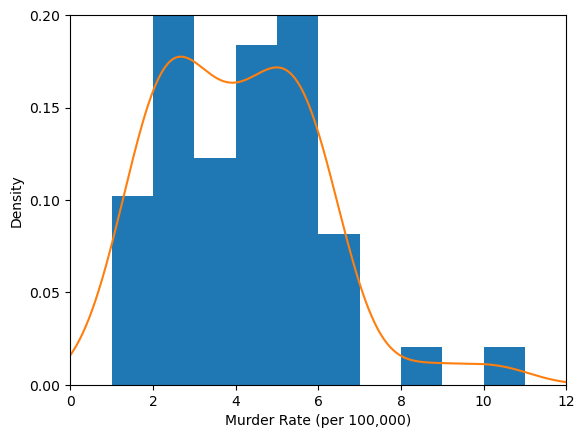

In [17]:
import pandas as pd

state = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/state.csv")

ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0,12], bins = range(1,12))
# density = True->히스토그램의 막대 높이를 상대적 확률로 표시
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

# Y축 범위 설정 및 간격 지정
ax.set_ylim(0.00, 0.20)
ax.set_yticks([0.00, 0.05, 0.10, 0.15, 0.20])

## 1.6 이진데이터와 범주데이터 탐색 (새로운 데이터 이용-dfw) p. 47

Text(0, 0.5, 'Count')

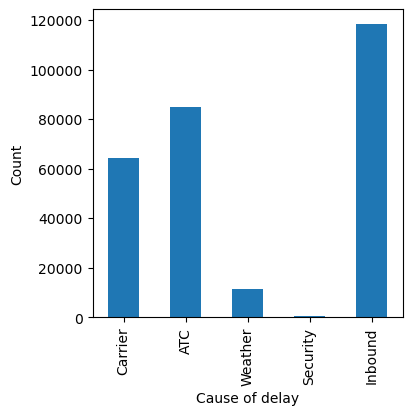

In [19]:
import pandas as pd

dfw = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/dfw_airline.csv")

# 이진 데이터와 범주데이터 탐색 p. 47
ax = dfw.transpose().plot.bar(figsize = (4,4), legend = False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

막대도표와 히스토그램의 차이점

- 히스토그램 : x축이 수치로 나타나는 변수의 값, 일반적으로 막대가 붙어있음
- 막대도표 : x축이 각 요인 변수의 서로 다른 범주를 나타냄, 막대 떨어져있음

## 1.7 상관관계 시각화 p. 52 (잘 안됨..)

In [27]:
import pandas as pd
import seaborn as sns

sp500_px = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/sp500_data.csv.gz")
sp500_sym = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/sp500_sectors.csv")


etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

sns.heatmap(etfs.corr(), vmin = -1, vmax =1,
            cmap = sns.diverging_palette(20, 220, as_cmap = True))

TypeError: Invalid comparison between dtype=int64 and str

## 1.8 산점도 p. 54

sp500 data로 telecom 변수 설정했음

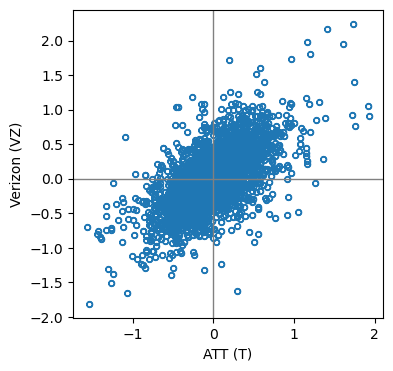

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

telecom = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/sp500_data.csv.gz")

# AT&T와 버라이즌 수익 사이의 산점도 p. 54
ax = telecom.plot.scatter(x = 'T', y = 'VZ', figsize = (4,4), marker = '$\u25EF$')  
# 산점도 그래프의 포인트를 원모양으로 표시하도록 지정
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color = 'gray', lw = 1)
ax.axvline(0, color = 'gray', lw = 1)
# 산점도 그래프에 x축의 0 지점에 회색 수직선을 그림 
# 데이터 포인트가 x축의 0 지점을 기준으로 어떻게 분포하는지 시각적으로 확인가능

## 1.9 육각형 구간과 등고선 p. 56

육각형 구간까지는 잘 나오는데 등고선이 시간이 너무 오래 걸림-> 정지

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

kc_tax = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/kc_tax.csv.gz")


# 데이터 필터링 p. 56
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                      (kc_tax.SqFtTotLiving > 100) & 
                      (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

# 육각형 구간 도표 p. 57
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue',
                         gridsize = 30, sharex = False, figsize = (5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

# 등고선 도표 생성 p. 58
fig, ax = plt.subplots(figsize = (4,4))
ax = sns.kdeplot(data = kc_tax0, x = 'SqFtTotLiving', y = 'TaxAssessedValue', ax = ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [4]:
import pandas as pd

lc_loans = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/lc_loans.csv")

# aggfunc인수를 사용해서 횟수 정보를 얻고, 분할표를 만듦
crosstab = lc_loans.pivot_table(index = 'grade', columns = 'status', aggfunc = lambda x: len(x), margins = True)

df = crosstab.loc['A':'G', :].copy()
df.loc[:,'Charged Off' : 'Late'] = df.loc[:, 'Charged Off' : 'Late'].div(df['All'], axis = 0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


바이올린플롯 부분이 틀림

TypeError: violinplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

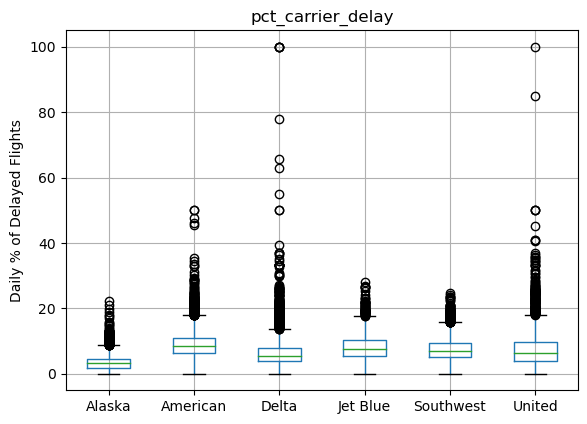

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

airline_stats = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/airline_stats.csv")

# 그룹별 분할 및 상자그림 생성
ax = airline_stats.boxplot(by = 'airline', column =  'pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

# 바이올린 도표 생성
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay, inner = 'quartile', color = 'white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x, y, gridsize = 25, cmap = cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col = 'ZipCode', col_wrap = 2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent = [0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_title('Zip code {col_name:.0f}')